In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('new_retail_data.csv')

# Display first few rows
print(df.head(4))


   Transaction_ID  Customer_ID                 Name              Email  \
0       8691788.0      37249.0  Michelle Harrington  Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill   Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen  Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller   Mary34@gmail.com   

          Phone                      Address        City            State  \
0  1.414787e+09            3959 Amanda Burgs    Dortmund           Berlin   
1  6.852900e+09           82072 Dawn Centers  Nottingham          England   
2  8.362160e+09            4133 Young Canyon     Geelong  New South Wales   
3  2.776752e+09  8148 Thomas Creek Suite 100    Edmonton          Ontario   

   Zipcode    Country  ...  Total_Amount Product_Category  Product_Brand  \
0  77985.0    Germany  ...    324.086270         Clothing           Nike   
1  99071.0         UK  ...    806.707815      Electronics        Samsung   
2  75929.0  Aus

In [3]:
# Remove duplicate rows
df = df.drop_duplicates()

# Check for any remaining duplicates
print(df.duplicated().sum())


0


In [4]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (example: fill with median for numerical columns)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Email'].fillna('No Email', inplace=True)

# Alternatively, you can drop rows with missing values
# df = df.dropna()


Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              356
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_1612\1342023540.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_1612\1342023540.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [5]:
# Convert 'Date' and 'Time' columns to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Ensure numerical columns are in the correct format
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Total_Amount'] = pd.to_numeric(df['Total_Amount'], errors='coerce')

# Check the data types
print(df.dtypes)


Transaction_ID             float64
Customer_ID                float64
Name                        object
Email                       object
Phone                      float64
Address                     object
City                        object
State                       object
Zipcode                    float64
Country                     object
Age                        float64
Gender                      object
Income                      object
Customer_Segment            object
Date                datetime64[ns]
Year                       float64
Month                       object
Time                        object
Total_Purchases            float64
Amount                     float64
Total_Amount               float64
Product_Category            object
Product_Brand               object
Product_Type                object
Feedback                    object
Shipping_Method             object
Payment_Method              object
Order_Status                object
Ratings             

In [6]:
# Standardize text data: for example, trim spaces and make them lowercase
df['Name'] = df['Name'].str.strip().str.lower()
df['Email'] = df['Email'].str.strip().str.lower()
df['Address'] = df['Address'].str.strip().str.lower()

# Remove any leading or trailing spaces in categorical columns
categorical_cols = ['City', 'State', 'Country', 'Gender', 'Income', 'Customer_Segment', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status']
for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()


In [7]:
# Drop one of the 'Total_Amount' columns as they seem to be duplicated
df = df.loc[:, ~df.columns.duplicated()]

# Check the columns to confirm
print(df.columns)


Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')


In [8]:
# For example, extract the hour from the 'Time' column
df['Hour'] = df['Time'].apply(lambda x: x.hour)

# Create any other necessary columns as needed


In [9]:
print(df.head(4))

   Transaction_ID  Customer_ID                 Name              Email  \
0       8691788.0      37249.0  michelle harrington  ebony39@gmail.com   
1       2174773.0      69749.0          kelsey hill   mark36@gmail.com   
2       6679610.0      30192.0         scott jensen  shane85@gmail.com   
3       7232460.0      62101.0        joseph miller   mary34@gmail.com   

          Phone                      Address        City            State  \
0  1.414787e+09            3959 amanda burgs    dortmund           berlin   
1  6.852900e+09           82072 dawn centers  nottingham          england   
2  8.362160e+09            4133 young canyon     geelong  new south wales   
3  2.776752e+09  8148 thomas creek suite 100    edmonton          ontario   

   Zipcode    Country  ...  Product_Category  Product_Brand Product_Type  \
0  77985.0    germany  ...          Clothing           nike       shorts   
1  99071.0         uk  ...       Electronics        samsung       tablet   
2  75929.0  aus

In [10]:
df['Product_ID'] =df['Product_Type'] + '_' + df['Product_Brand']
user_item_matrix = df.pivot_table(index='Customer_ID', columns='Product_ID', values='Total_Purchases', fill_value=0)
print(df.head(4))

   Transaction_ID  Customer_ID                 Name              Email  \
0       8691788.0      37249.0  michelle harrington  ebony39@gmail.com   
1       2174773.0      69749.0          kelsey hill   mark36@gmail.com   
2       6679610.0      30192.0         scott jensen  shane85@gmail.com   
3       7232460.0      62101.0        joseph miller   mary34@gmail.com   

          Phone                      Address        City            State  \
0  1.414787e+09            3959 amanda burgs    dortmund           berlin   
1  6.852900e+09           82072 dawn centers  nottingham          england   
2  8.362160e+09            4133 young canyon     geelong  new south wales   
3  2.776752e+09  8148 thomas creek suite 100    edmonton          ontario   

   Zipcode    Country  ...  Product_Brand Product_Type   Feedback  \
0  77985.0    germany  ...           nike       shorts  excellent   
1  99071.0         uk  ...        samsung       tablet  excellent   
2  75929.0  australia  ...  penguin 

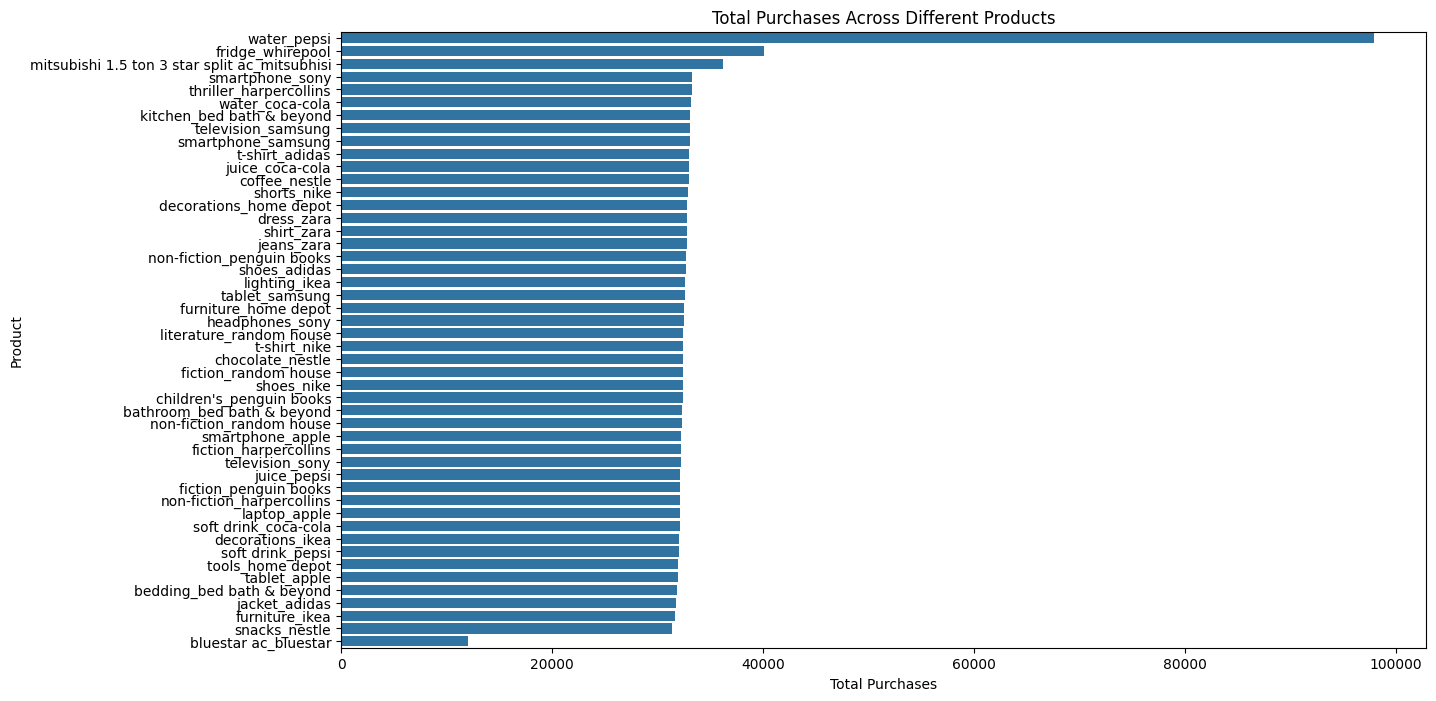

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate the total purchases per product
product_purchases = df.groupby('Product_ID')['Total_Purchases'].sum().reset_index()

# Plot the distribution
plt.figure(figsize=(14, 8))
sns.barplot(x='Total_Purchases', y='Product_ID', data=product_purchases.sort_values(by='Total_Purchases', ascending=False))
plt.title('Total Purchases Across Different Products')
plt.xlabel('Total Purchases')
plt.ylabel('Product')
plt.show()


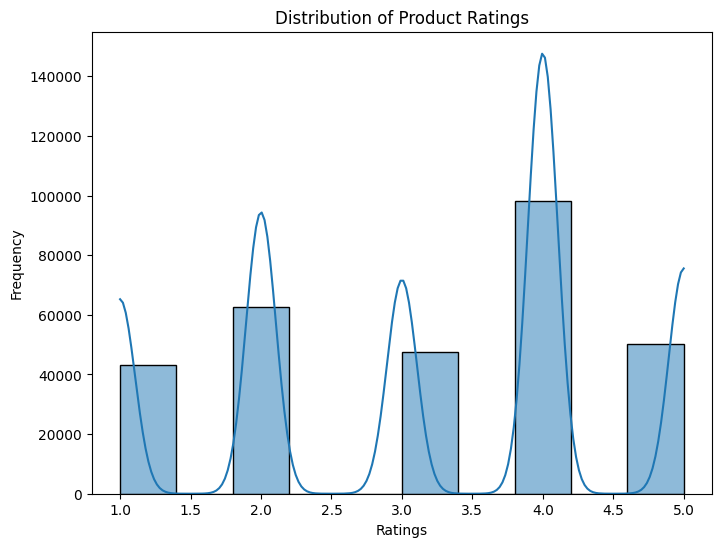

In [12]:
# Check if the 'Ratings' column exists
if 'Ratings' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Ratings'], bins=10, kde=True)
    plt.title('Distribution of Product Ratings')
    plt.xlabel('Ratings')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Ratings column not found in the dataset.")


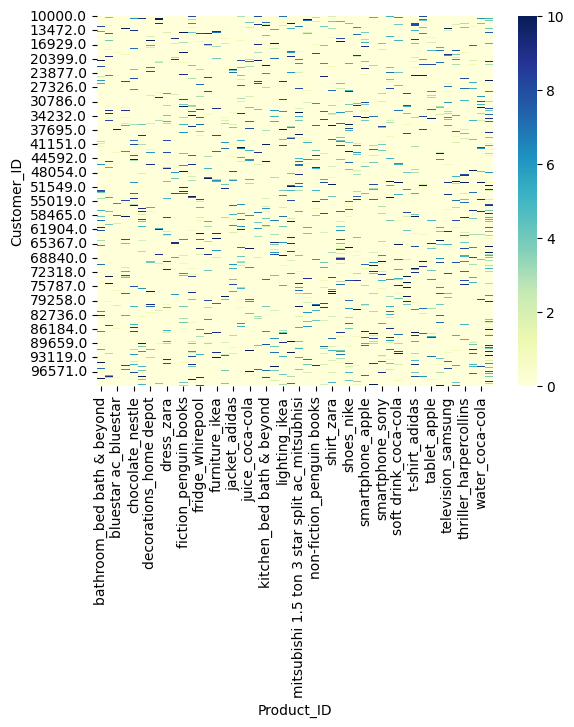

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(user_item_matrix, cmap='YlGnBu')
plt.show()


In [14]:
ratings_df = df[['Customer_ID', 'Product_ID', 'Ratings']]


In [15]:
df.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Date,Year,Total_Purchases,Amount,Total_Amount,Ratings,Hour
count,3.016730e+05,301698.000000,3.016440e+05,301666.000000,302006.00000,301647,301656.000000,301645.000000,301650.000000,301656.000000,301822.000000,301656.000000
mean,5.495836e+06,55006.868783,5.501470e+09,50299.030368,35.47904,2023-08-30 16:16:16.431391232,2023.165115,5.359701,255.164212,1367.645660,3.162685,11.505142
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.00000,2023-03-01 00:00:00,2023.000000,1.000000,10.000219,10.003750,1.000000,0.000000
25%,3.247930e+06,32470.000000,3.255061e+09,25425.000000,22.00000,2023-05-31 00:00:00,2023.000000,3.000000,132.889531,438.721039,2.000000,6.000000
50%,5.499735e+06,55013.000000,5.505812e+09,50602.500000,32.00000,2023-08-31 00:00:00,2023.000000,5.000000,255.471692,1041.104986,3.000000,11.000000
75%,7.739524e+06,77511.000000,7.749883e+09,75252.000000,46.00000,2023-11-30 00:00:00,2023.000000,8.000000,377.673223,2029.990894,4.000000,18.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.00000,2024-02-29 00:00:00,2024.000000,10.000000,499.997911,4999.625796,5.000000,23.000000
std,2.595578e+06,26005.672186,2.596024e+09,28972.877050,15.01774,NaN,0.371285,2.868580,141.390122,1129.002947,1.320822,6.910070


In [16]:
df.shape

(302006, 32)

In [17]:
df.columns

Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products', 'Hour', 'Product_ID'],
      dtype='object')

In [19]:
df.nunique()

Transaction_ID      294461
Customer_ID          86766
Name                159390
Email                52898
Phone               299295
Address             299329
City                   130
State                   54
Zipcode              93978
Country                  5
Age                     53
Gender                   2
Income                   3
Customer_Segment         3
Date                   366
Year                     2
Month                   12
Time                 83677
Total_Purchases         10
Amount              299297
Total_Amount        299305
Product_Category         5
Product_Brand           18
Product_Type            33
Feedback                 4
Shipping_Method          3
Payment_Method           4
Order_Status             4
Ratings                  5
products               318
Hour                    24
Product_ID              48
dtype: int64

In [20]:
df.isnull().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email                 0
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                   0
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              356
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
Hour                350
Product_ID          281
dtype: int64

In [22]:
# Drop rows with missing Transaction_ID and Customer_ID
df = df.dropna(subset=['Transaction_ID', 'Customer_ID'])

In [23]:
# Impute missing values
# For numerical columns, fill with mean
numerical_cols = ['Phone', 'Zipcode', 'Total_Purchases', 'Amount', 'Total_Amount', 'Ratings']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

# For categorical columns, fill with mode
categorical_cols = ['Name', 'Address', 'City', 'State', 'Country', 'Gender', 'Income', 'Customer_Segment', 
                    'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 
                    'Payment_Method', 'Order_Status', 'products']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# For date-related columns, fill with forward fill or backward fill
date_cols = ['Date', 'Year', 'Month', 'Time']
for col in date_cols:
    df[col] = df[col].fillna(method='ffill')

# After filling, if there are still any missing values, handle them accordingly
# Check for remaining missing values
print(df.isnull().sum())

C:\Users\USER\AppData\Local\Temp\ipykernel_1612\1687934092.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mean())
C:\Users\USER\AppData\Local\Temp\ipykernel_1612\1687934092.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_1612\1687934092.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[

Transaction_ID        0
Customer_ID           0
Name                  0
Email                 0
Phone                 0
Address               0
City                  0
State                 0
Zipcode               0
Country               0
Age                   0
Gender                0
Income                0
Customer_Segment      0
Date                  0
Year                  0
Month                 0
Time                  0
Total_Purchases       0
Amount                0
Total_Amount          0
Product_Category      0
Product_Brand         0
Product_Type          0
Feedback              0
Shipping_Method       0
Payment_Method        0
Order_Status          0
Ratings               0
products              0
Hour                350
Product_ID          278
dtype: int64


(301365, 32)

In [25]:
df.head(3)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Hour,Product_ID
0,8691788.0,37249.0,michelle harrington,ebony39@gmail.com,1.414787e+09,3959 amanda burgs,dortmund,berlin,77985.0,germany,...,nike,shorts,excellent,same-day,debit card,shipped,5.0,Cycling shorts,22.0,shorts_nike
1,2174773.0,69749.0,kelsey hill,mark36@gmail.com,6.852900e+09,82072 dawn centers,nottingham,england,99071.0,uk,...,samsung,tablet,excellent,standard,credit card,processing,4.0,Lenovo Tab,8.0,tablet_samsung
2,6679610.0,30192.0,scott jensen,shane85@gmail.com,8.362160e+09,4133 young canyon,geelong,new south wales,75929.0,australia,...,penguin books,children's,average,same-day,credit card,processing,2.0,Sports equipment,4.0,children's_penguin books


In [27]:
df.isnull().sum()

Transaction_ID        0
Customer_ID           0
Name                  0
Email                 0
Phone                 0
Address               0
City                  0
State                 0
Zipcode               0
Country               0
Age                   0
Gender                0
Income                0
Customer_Segment      0
Date                  0
Year                  0
Month                 0
Time                  0
Total_Purchases       0
Amount                0
Total_Amount          0
Product_Category      0
Product_Brand         0
Product_Type          0
Feedback              0
Shipping_Method       0
Payment_Method        0
Order_Status          0
Ratings               0
products              0
Hour                350
Product_ID          278
dtype: int64

In [28]:
# Convert Date and Time to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour


C:\Users\USER\AppData\Local\Temp\ipykernel_1612\1880065394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\USER\AppData\Local\Temp\ipykernel_1612\1880065394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
C:\Users\USER\AppData\Local\Temp\ipykernel_1612\1880065394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [29]:
# Save the cleaned dataset to a new CSV file
cleaned_data_path = 'cleaned_dataset.csv'
df.to_csv(cleaned_data_path, index=False)

print(f'Cleaned dataset saved to {cleaned_data_path}')


Cleaned dataset saved to cleaned_dataset.csv
